In [4]:
install.packages("tidyverse")
library(tidyverse)


also installing the dependencies ‘rematch’, ‘assertthat’, ‘blob’, ‘DBI’, ‘data.table’, ‘gargle’, ‘cellranger’, ‘ids’, ‘selectr’, ‘dbplyr’, ‘dtplyr’, ‘googledrive’, ‘googlesheets4’, ‘lubridate’, ‘modelr’, ‘readxl’, ‘reprex’, ‘rvest’





The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpvKVTRB/downloaded_packages


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lab 2. Contingency Tables


---

In this session we are going to introduce contingency tables and learn how to create tables in R directly, and how to obtain contingency tables from counting data.


## Direct Input


Let’s now analyse the two-by-two tables of data we worked on during the previous lectures:

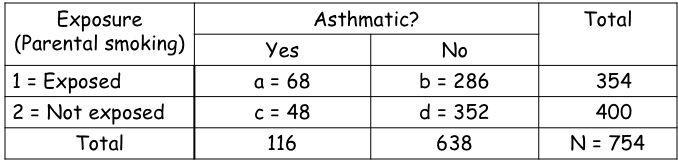


In this case during the lecture we used the Z-test, however, unless you’d like to write the function for the test yourself, you won’t be able to use such test. What people use instead to compare two observed proportions is Chi-Square test ($\chi^2$ test), which is equivalent to the Z-test for two proportions. For this test the null hypothesis can be formulated as “$X_1$ is independent of (not associated to) $X_2$”, where $X_1$ and $X_2$ are the two categorical variables being compared (Exposure and Being asthmatic). 

We can write:

In [5]:
yes=c(68,48) 
no=c(286,352) 

Let 's visualise these data in a table format:

In [6]:
TblSmoke = cbind(yes,no)
TblSmoke

yes,no
68,286
48,352


We can add names to the rows and visualise the table again:

In [7]:
rownames(TblSmoke)=c("exposed","not exposed")
TblSmoke

,yes,no
exposed,68,286
not exposed,48,352


We can also add the margins:

In [8]:
addmargins(TblSmoke)

,yes,no,Sum
exposed,68,286,354
not exposed,48,352,400
Sum,116,638,754


Now the table looks like the ones we have seen so far during the lectures.  
We can visualise the data in the table using a mosaic plot, as follows

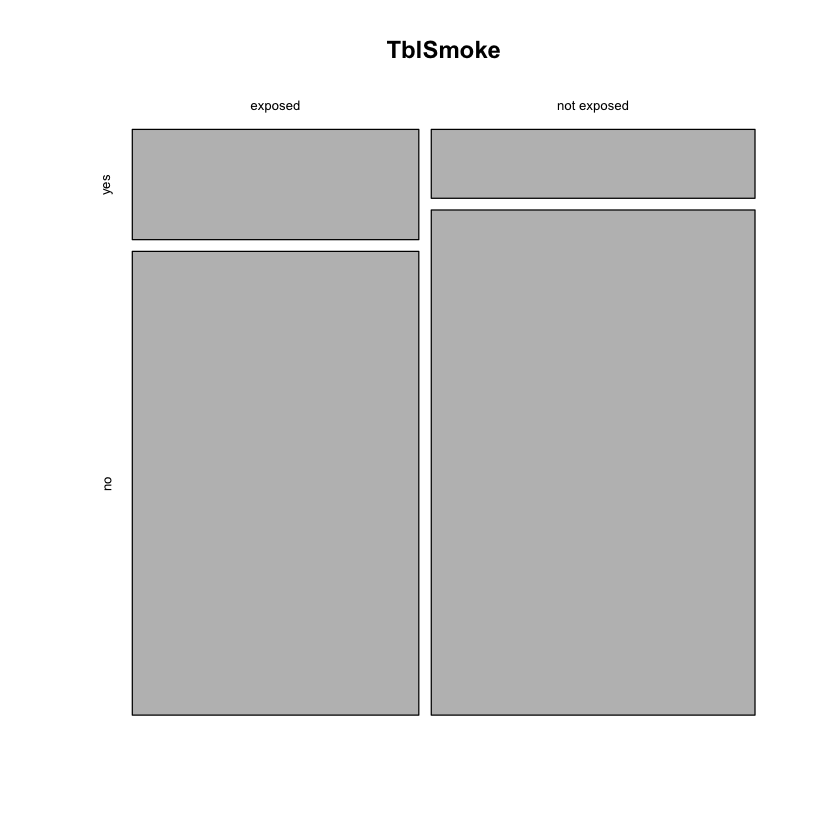

In [9]:
mosaicplot(TblSmoke)

To see if there is evidence of an association between being asmatic and being exposed we must run a chi-square test. This can be done using the command `chisq.test(TblSmoke)`

In [10]:
chisq.test(TblSmoke,correct = FALSE)


	Pearson's Chi-squared test

data:  TblSmoke
X-squared = 7.4974, df = 1, p-value = 0.006179


Or by using a test of proportions as in the following code cell:

In [11]:
total=c(354,400) 
prop.test(yes, total, correct = FALSE)


	2-sample test for equality of proportions without continuity correction

data:  yes out of total
X-squared = 7.4974, df = 1, p-value = 0.006179
alternative hypothesis: two.sided
95 percent confidence interval:
 0.0201460 0.1240348
sample estimates:
   prop 1    prop 2 
0.1920904 0.1200000 




---
*From stats.stackexchange.com*

The chi-Squared test (chisq.test() 
in R) compares the observed frequencies in each category of a contingency table with the expected frequencies (computed as the product of the marginal frequencies). It is used to determine whether the deviations between the observed and the expected counts are too large to be attributed to chance. Departure from independence is easily checked by inspecting residuals (try (?)mosaicplot or (?)assocplot, but also look at the vcd package). Use fisher.test() for an exact test (relying on the hypergeometric distribution).

The prop.test() function in R allows to test whether proportions are comparable between groups or if they do not differ from theoretical probabilities. It is referred to as a 𝑧-test because the test statistic looks like this:

$$𝑧=\dfrac{(𝑓_1−𝑓_2)}{\hat{p}(1-\hat{p})\left(\frac{1}{n_1}+\frac{1}{n_2}\right)}$$

where $\hat p =(p_1+p_2)/(𝑛_1+𝑛_2)$, and the indices (1,2) refer to the first and second row of your table. In a two-way contingency table where $𝐻_0: 𝑝_1=𝑝_2$, this should yield comparable results to the ordinary $\chi^2$ test.
</div>

---



### Exercises


---


#### Exercise 1
HIV seropositivity and intravenous drug use (IVDU)

|IVDU   | HIV+| HIV- | Total|
|------ |-----| -----|------|
| Yes   | 61  |  75  | 136  |
| No    | 27  | 312  | 339  |
| Total | 88  | 387  | 475  |

Is there evidence that testing positive for HIV is associated with intravenous drug use?

Define disease (HIV+) and no disease (HIV-) columns:

In [16]:
yes=c(61, 75)
no=c(27, 312)
TblHIV = cbind(yes,no)
rownames(TblHIV)=c("HIV+","HIV-")
addmargins(TblHIV)


,yes,no,Sum
HIV+,61,27,88
HIV-,75,312,387
Sum,136,339,475


We can now run the $\chi^2$ test using the command `chisq.test(TblHIV)`



In [20]:
chisq.test(TblHIV, correct = FALSE)


	Pearson's Chi-squared test

data:  TblHIV
X-squared = 87.502, df = 1, p-value < 2.2e-16


---

#### Exercise 2
Chaga's disease

|Breast feeding   | Disease| No disease | Total|
|-----------------|--------|------------|------|
| Yes             | 175    |  1874      | 2049 |
| No              | 383    | 7568       | 7951 |
| Total           | 558    | 9442       | 10000|

Is there evidence of an association between breast feeding and Chaga’s disease?

## Input from datafile

### File upload and creation of contingency tables.

Before starting this session you will need to download the data file “Titanic data.sav” (and/or .csv). This file  contains data relating to 1313 passengers on the final voyage of the SS Titanic. Note: passengers do not form a “random” sample and analysis of these data is purely for illustrative purposes. 

To upload the file click on the *folder* icon on the left hand side 

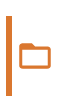

and then click on the *upload to session storage* icon 

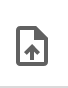

Find the file and click *open*.

This .sav is an SPSS file and to open it you will need to upload the R package `haven`.

In [44]:
library(haven)
dataset <- read_sav("Titanic data.sav")
head(dataset)

name,pclass,age,sex,alive,survived,class
<chr>,<chr>,<dbl>,<chr>,<dbl+lbl>,<dbl+lbl>,<dbl>
"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
"Allison, Miss Helen Loraine",1st,2.00,female,2,0,1
"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,2,0,1
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,2,0,1
"Allison, Master Hudson Trevor",1st,0.92,male,1,1,1
"Anderson, Mr Harry",1st,47.00,male,1,1,1


In an equivalent way we can open the .csv file:

In [25]:
dataset = read.csv("Titanic_data.csv")
View(dataset)

X,name,pclass,age,sex,alive,survived,class
<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,2,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,2,0,1
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,2,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,1,1
6,"Anderson, Mr Harry",1st,47.00,male,1,1,1
7,"Andrews, Miss Kornelia Theodosia",1st,63.00,female,1,1,1
8,"Andrews, Mr Thomas, jr",1st,39.00,male,2,0,1
9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.00,female,1,1,1


We can now generate a table having “sex” in the rows and “alive” in the columns.
The first and easiest way of doing so is by using the command `table`.

In [47]:
TblRaw = table(dataset$sex,dataset$alive)
# add the margins
TblRaw1 <- dataset$sex %>%  
    table(dataset$alive)

addmargins(TblRaw)

addmargins(TblRaw1)

,1,2,Sum
female,308,154,462
male,142,709,851
Sum,450,863,1313


,1,2,Sum
female,308,154,462
male,142,709,851
Sum,450,863,1313


If we want to make explicit that *yes* is 1 and *no* is 2 we can do the following:

In [28]:
colnames(TblRaw) <- c("Yes", "No")
addmargins(TblRaw)

,Yes,No,Sum
female,308,154,462
male,142,709,851
Sum,450,863,1313


We can now visualise the data and run a $\chi^2$ test.


	Pearson's Chi-squared test

data:  TblRaw
X-squared = 332.06, df = 1, p-value < 2.2e-16


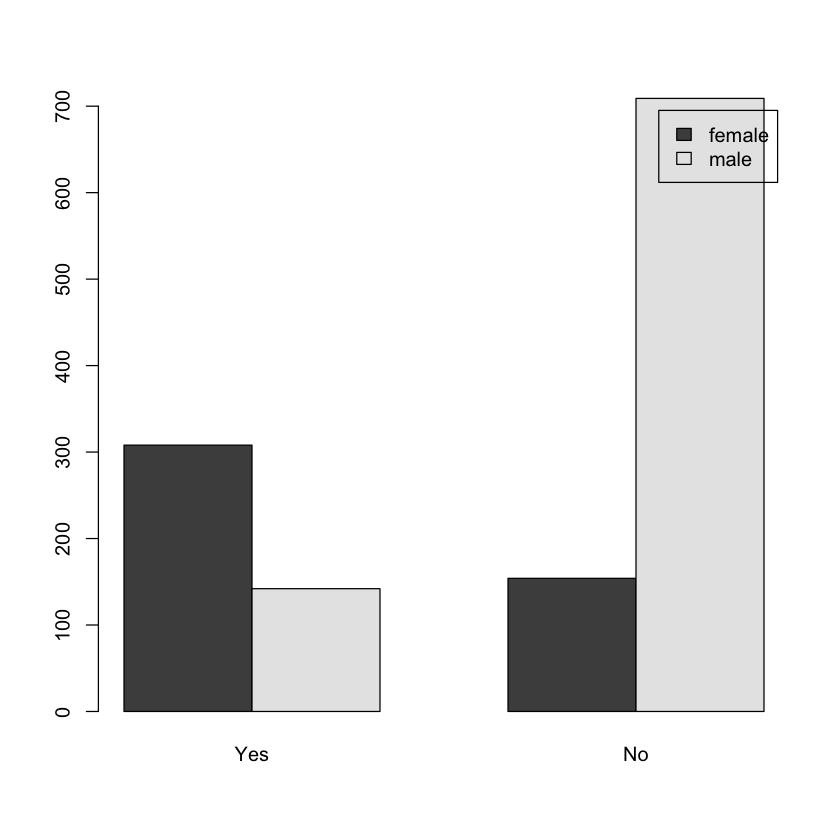

In [29]:
barplot(TblRaw,beside=T,legend=T) #This is to show how the data look like 
chisq.test(TblRaw,correct = FALSE)

## Relative Risk, Odds Ratio and Risk Difference (or Attributable Risk)

####Method 1

There are numerous ways to calculate RR, OR and AR from contingency tables. The first method consists in obtaining  the proportions of the contingency table and calculate the quantities of interest explicitely.  The proportions can be calculate overall, by row or by column as follows:

In [30]:
# overall
prop.table(TblRaw)
# by row
prop.table(TblRaw, margin = 1)
# by column
prop.table(TblRaw, margin = 2)

        
               Yes        No
  female 0.2345773 0.1172887
  male   0.1081493 0.5399848

        
               Yes        No
  female 0.6666667 0.3333333
  male   0.1668625 0.8331375

        
               Yes        No
  female 0.6844444 0.1784473
  male   0.3155556 0.8215527

To calculate AR and RR we can use the proportions by row:

In [31]:
prop.out <- prop.table(TblRaw, margin = 1)
# relative risk of female vs. male
prop.out[1,1]/prop.out[2,1]

[1] 3.995305

In [32]:
#Attributable risk for female vs. male
prop.out[1,1]-prop.out[2,1]

[1] 0.4998042

To calculate the OR we calculate first the odds for each row and then the ratio between the two:

In [33]:
# odds of survival in female
odds1 = prop.out[1,1]/prop.out[1,2]
odds1
# odds of survival in male
odds2 = prop.out[2,1]/prop.out[2,2]
odds2
#OR
odds1/odds2

[1] 2

[1] 0.2002821

[1] 9.985915

####Method 2

The second method to calculate RR, OR and AR in 2x2 contingency tables, consists in using the command `epi.2by2` in the epiR package. To use it we will need to install the package epiR. The installation of epiR can cause some issues in colab. If that is the case then go to Method 3.

Some of the installation issues could be solved by installing system packages such as the following ones:
libcurl4-openssl-dev, 
* libgsl0ldbl, 
* gsl-bin, 
* libgsl0-dev, 
* g++, 
* gcc, 
* gfortran-8, 
* librsvg2-dev, 
* udunits-2.

To install the system packages you can use either of the following commands:

cat(system('sudo apt-get install -y librsvg2-dev', intern=TRUE), sep = "\n")

system('sudo apt-get install -y librsvg2-dev', intern=TRUE)

In [34]:
cat(system('sudo apt-get install -y udunits', intern=TRUE), sep = "\n")

Warning message in system("sudo apt-get install -y udunits", intern = TRUE):
“running command 'sudo apt-get install -y udunits' had status 1”


In [35]:
install.packages("epiR")
library(epiR)

also installing the dependencies ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘gdtools’, ‘BiasedUrn’, ‘pander’, ‘sf’, ‘zoo’, ‘flextable’, ‘officer’





The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpvKVTRB/downloaded_packages


Loading required package: survival

Package epiR 2.0.52 is loaded

Type help(epi.about) for summary information

Type browseVignettes(package = 'epiR') to learn how to use epiR for applied epidemiological analyses






We can now use the function:

In [36]:
epi.2by2(TblRaw,method="cohort.count",conf.level=0.95)

             Outcome +    Outcome -      Total        Inc risk *        Odds
Exposed +          308          154        462              66.7       2.000
Exposed -          142          709        851              16.7       0.200
Total              450          863       1313              34.3       0.521

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 4.00 (3.39, 4.70)
Odds ratio                                     9.99 (7.67, 13.01)
Attrib risk in the exposed *                   49.98 (45.01, 54.96)
Attrib fraction in the exposed (%)            74.97 (70.53, 78.74)
Attrib risk in the population *                17.59 (14.00, 21.17)
Attrib fraction in the population (%)         51.31 (45.22, 56.73)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 332.057 Pr>chi2 = <0.001
Fisher exact test that OR = 1: Pr>chi2 = <0.001
 Wald c

**Note**: the *method* in the command call can be set to "case.control" if the data come from a case control study, but in this case the relative risk will not be returned.

####Method 3

The last method we are going to introduce makes use of the functions in the *epitools* package:

In [39]:
install.packages("epitools")
library(epitools)


The downloaded binary packages are in
	/var/folders/3m/hvvbkscs3g18gqtdpjbjc7l80000gn/T//RtmpvKVTRB/downloaded_packages


The Risk Ratio can be calculated using the function `riskratio`. 

In [40]:
# RR with 95% confidence interval
riskratio(TblRaw)

,Yes,No,Total
female,308,154,462
male,142,709,851
Total,450,863,1313
,estimate,lower,upper
female,1.000000,NA,NA
male,2.499412,2.189428,2.853285
,midp.exact,fisher.exact,chi.square
female,NA,NA,NA
male,0,4.826448e-74,3.425855e-74


Notice that there are differences between the values we calculated earlier and those calculated by the riskratio function. Why do you think that is the case?

Let's try to reverse the order of columns 'c', rows 'r' or both 'b' and see what happens.

In [41]:
# RR with 95% confidence interval
riskratio(TblRaw, rev="b")

,No,Yes,Total
male,709,142,851
female,154,308,462
Total,863,450,1313
,estimate,lower,upper
male,1.000000,NA,NA
female,3.995305,3.393057,4.704449
,midp.exact,fisher.exact,chi.square
male,NA,NA,NA
female,0,4.826448e-74,3.425855e-74


In [42]:
# RR with 95% confidence interval
rr.out <-riskratio(TblRaw, rev="r")
rr.out$measure

,estimate,lower,upper
male,1.000000,NA,NA
female,0.400094,0.3504733,0.4567402


For the OR we can use the function oddsratio. Would you expect difefrent results by reversing the rows' and columns' order?

In [43]:
oddsratio(TblRaw,rev="b")

,No,Yes,Total
male,709,142,851
female,154,308,462
Total,863,450,1313
,estimate,lower,upper
male,1.000000,NA,NA
female,9.956188,7.662525,13.00928
,midp.exact,fisher.exact,chi.square
male,NA,NA,NA
female,0,4.826448e-74,3.425855e-74


---
*Now try to solve all exercises from the first section of the lecture notes.*
---
---

